# To Born or Not To Born

#### Baran Ekin Özdemir

Stillbirth or fetal death and low weight birth are problems that still exist in todays world. This project aims to predict the outcome of a pregnancy depending on various features of parents including medical, physical, racial and economic metrics. Two distinct classifiers are trained for this project.<br><br>
-First model is a multiclass classifier which aims to predict whether infant to be born will weight low, normal or high at birth.<br>
-Second model is a binary classifier that aims to predict whether outcome of a pregnancy will result in birth or fetal death. <br><br>
This project also tries to uncover some meaningful insights on 2018 US Births data.

## Table of Content

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## Problem <a class="anchor" id="problem"></a>

### The Problem of Underweight and Overweight Birth
Underweight or low birth weight is a term used to describe babies who are born weighing less than 2,500 grams. A low-birth-weight baby may be healthy even though he or she is small. But a low-birth-weight baby can also have many serious health problems.<br><br>
Known causations of this problem include:<br>
-Infection during pregnancy<br>
-Not gaining enough weight during pregnancy<br>
-Previous pregnancy with a low-birth-weight baby<br>
-Smoking<br>
-Alcohol or drug use<br>
-Age less than 17 or more than 35 years<br>
-African-American background<br><br>
Likely, even though less common, high birth weight may cause complications during pregnancy and birth. High weight birth are also effected by the features above.<br>
Some of these causations are provided in US births dataset so we might be able to train a model to predict weight class of the baby to be born. This prediction may help parents and medical personel to take precautions during pregnancy and before the birth.

### The Problem of Fetal Death
Fetal death is a term used when a fetus dies in any time during pregnancy. Fetal deaths that occur in late pregnancy (at 20 weeks of gestation or more, or 28 weeks or more, for example) are also sometimes referred to as stillbirths.<br>

Possible causations of this problem include:<br>
-Infection during pregnancy<br>
-Mother's health<br>
-Maternal age<br>
-Birth history etc.<br>

Comparing same data for successful births and fetal deaths, may allow us to train a model to predict outcome of the pregnancy so that precautions can be taken.

## Data Understanding<a class="anchor" id="data_understanding"></a>

For this project, public US Birth Data and US Fetal Death Data published by US National
Center for Health Statistics (NCHS) of Centers for Disease Control and Preventation (CDC) at
National Vital Statistics System (NVSS) will be used.<br><br>
These are records of birth and fetal death for a year in the United States. Most of the fields are categorical and some of them are numerical. In this chapter, we will try to understand the data at hand.

### Importing Libraries<a class="anchor" id="importing_libraries"></a>

In [175]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import date
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

### Importing Data Into DataFrames<a class="anchor" id="importing_data"></a>

#### Importing Births CSV Into DataFrame

Original birth data is raw and in a unique form that values are positioned in a specific positions in each line. For this project, births dataset from Kaggle that is in csv form will be used.<br>
This dataset is very large and has more than 3.5 million rows and more than 50 columns. Having that many rows does not improve performance after some point. For this project, sampled form of this dataset with around 300.000 rows will be used for ease of development and deployment.

In [176]:
df_births = pd.read_csv(".\\data\\us_births.csv", low_memory=False)

#### Importing Raw Fetal Death Data Into DataFrame

Original fetal deaths data is raw and in a unique form that values are positioned in a specific positions in each line. For this project, csv form of that dataset which is prepared for this project will be used. Only the columns that match with births dateset will be used because they will be concatened for this project.<br>
There are around 50.000 rows in this dataset.

In [177]:
df_deaths = pd.read_csv(".\\data\\us_fetal.csv", low_memory=False, na_values='')

### Initial Inspection on Data<a class="anchor" id="initial_inspection"></a>

Let's take a look at our datasets first.

In [178]:
df_births.info()
df_births

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334545 entries, 0 to 334544
Data columns (total 55 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ATTEND       334545 non-null  int64  
 1   BFACIL       334545 non-null  int64  
 2   BMI          334545 non-null  float64
 3   CIG_0        334545 non-null  int64  
 4   DBWT         334545 non-null  int64  
 5   DLMP_MM      334545 non-null  int64  
 6   DLMP_YY      334545 non-null  int64  
 7   DMAR         334545 non-null  float64
 8   DOB_MM       334545 non-null  int64  
 9   DOB_TT       334545 non-null  int64  
 10  DOB_WK       334545 non-null  int64  
 11  DOB_YY       334545 non-null  int64  
 12  DWgt_R       334545 non-null  int64  
 13  FAGECOMB     334545 non-null  int64  
 14  FEDUC        334545 non-null  int64  
 15  FHISPX       334545 non-null  int64  
 16  FRACE15      334545 non-null  int64  
 17  FRACE31      334545 non-null  int64  
 18  FRACE6       334545 non-

,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,DOB_TT,DOB_WK,DOB_YY,DWgt_R,FAGECOMB,FEDUC,FHISPX,FRACE15,FRACE31,FRACE6,ILLB_R,ILOP_R,ILP_R,IMP_SEX,IP_GON,LD_INDL,MAGER,MAGE_IMPFLG,MAR_IMP,MBSTATE_REC,MEDUC,MHISPX,MM_AICU,MRACE15,MRACE31,MRACEIMP,MRACE6,MTRAN,M_Ht_In,NO_INFEC,NO_MMORB,NO_RISKS,PAY,PAY_REC,PRECARE,PREVIS,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN
0,3,1,31.9,0,3140,3,2017,2.0,1,1346,6,2018,208,35,3,0,1,1,1,47,888,47,NaN,N,N,31,NaN,NaN,1,6,0,N,1,1,NaN,1,N,63,1,1,1,1,1,2,10,0,1,0,180,1,1,N,0,F,28
1,1,1,19.3,0,2520,2,2018,2.0,11,1720,2,2018,124,99,9,9,99,99,9,888,888,888,NaN,N,N,20,NaN,NaN,1,2,0,N,2,2,NaN,2,N,63,0,1,1,1,1,7,4,0,0,0,109,1,1,N,0,F,15
2,1,1,19.1,0,3070,4,2017,1.0,1,2230,7,2018,131,34,6,0,7,4,4,888,888,888,NaN,N,N,29,NaN,NaN,2,6,0,N,7,4,NaN,4,N,61,1,1,1,1,1,2,16,0,0,0,101,1,2,N,0,F,30
3,1,1,19.6,0,2863,99,9999,1.0,2,641,4,2018,146,40,6,0,1,1,1,888,888,888,NaN,N,N,28,NaN,NaN,1,6,0,N,1,1,NaN,1,N,67,1,1,1,2,2,2,12,0,0,0,125,1,1,N,0,M,21
4,1,1,41.6,4,3140,10,2017,1.0,8,2314,5,2018,239,35,4,0,1,1,1,66,888,66,NaN,N,N,27,NaN,NaN,1,5,0,N,1,1,NaN,1,N,65,1,1,1,2,2,3,15,0,1,0,250,1,1,N,0,F,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334540,5,2,31.9,0,3118,11,2017,1.0,8,930,2,2018,207,25,1,0,1,1,1,12,888,12,NaN,N,N,23,NaN,NaN,1,1,0,N,1,1,NaN,1,N,63,1,1,0,3,3,6,5,0,3,0,180,2,2,Y,2,F,27
334541,1,1,23.8,0,4610,99,9999,1.0,1,111,5,2018,160,44,6,1,1,1,1,888,888,888,NaN,N,N,34,NaN,NaN,1,6,0,N,1,1,NaN,1,N,62,1,1,1,2,2,99,99,0,0,0,130,3,1,N,0,F,30
334542,1,1,30.2,0,3285,3,2018,2.0,12,1732,2,2018,195,28,3,2,1,1,1,6,999,999,NaN,N,Y,24,NaN,NaN,2,3,9,N,1,1,1.0,1,N,62,1,1,1,2,2,2,10,0,1,1,165,1,2,N,0,F,30
334543,1,1,22.3,0,2296,7,2017,2.0,4,2107,5,2018,140,22,4,0,1,1,1,888,888,888,NaN,N,Y,20,NaN,NaN,1,3,0,N,1,1,NaN,1,N,62,1,1,1,1,1,3,14,0,0,0,122,1,1,N,0,F,18


As we can see here, there are 334545 rows and 55 columns in births dataset. Some columns seem to be mostly empty and some are object dtype. SEX column has textual data while all others have numerical data. Categorical features other than sex are encoded as numbers.<br><br>
According to the documentation of this data, some nan values are encoded as numbers like 9 for discrete values and 99.9 or 9999 for continuous values depending on the field. We will inspect them later.

In [179]:
df_deaths.info()
df_deaths

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49170 entries, 0 to 49169
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ATTEND       49170 non-null  int64  
 1   BFACIL       47283 non-null  float64
 2   BMI          49170 non-null  object 
 3   CIG_0        49170 non-null  object 
 4   DBWT         49170 non-null  int64  
 5   DLMP_MM      49170 non-null  int64  
 6   DLMP_YY      49170 non-null  int64  
 7   FAGECOMB     49170 non-null  int64  
 8   ILLB_R       49170 non-null  object 
 9   MAGER        49170 non-null  int64  
 10  MBSTATE_REC  49170 non-null  int64  
 11  MEDUC        47283 non-null  float64
 12  MRACE15      49170 non-null  object 
 13  M_Ht_In      49170 non-null  object 
 14  PRECARE      49170 non-null  object 
 15  PRIORDEAD    49170 non-null  int64  
 16  PRIORLIVE    49170 non-null  int64  
 17  PWgt_R       49170 non-null  object 
 18  RDMETH_REC   47283 non-null  float64
 19  REST

,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,FAGECOMB,ILLB_R,MAGER,MBSTATE_REC,MEDUC,MRACE15,M_Ht_In,PRECARE,PRIORDEAD,PRIORLIVE,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX
0,1,1.0,34.8,00,1130,7,2016,99,052,36,1,3.0,03,60,02,0,3,178,4.0,1,Y,03,M
1,1,1.0,38.7,20,1435,6,2016,26,003,23,1,4.0,15,61,02,0,3,205,3.0,1,N,00,M
2,2,1.0,32.8,00,3360,4,2016,99,888,22,1,3.0,03,64,00,0,0,191,1.0,1,N,00,M
3,1,1.0,21.5,00,2381,4,2016,33,199,33,2,5.0,10,60,07,1,0,110,1.0,1,N,00,M
4,1,1.0,99.9,00,3635,4,2016,21,888,20,1,3.0,01,70,05,0,0,999,1.0,1,N,00,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49165,1,1.0,99.9,99,9999,6,2017,99,999,33,1,9.0,01,99,99,99,99,999,9.0,1,U,99,U
49166,2,1.0,99.9,99,9999,8,2017,99,999,34,1,9.0,01,99,99,99,99,999,9.0,1,U,99,U
49167,2,1.0,99.9,99,9999,6,2017,99,999,18,1,9.0,01,99,99,99,99,999,9.0,1,U,99,U
49168,2,1.0,99.9,99,9999,7,2017,99,999,27,1,9.0,01,99,99,99,99,999,9.0,1,U,99,U


As we can see here, there are 49170 rows and 23 columns in deaths dataset. These are subset of the columns of original data which match with the births dataset. Most columns seem to be non-null and some are object dtype. SEX column has textual data while all others have numerical data. Categorical features other than sex are encoded as numbers.<br><br>
According to the documentation of this data, some nan values are encoded as numbers like 9 for discrete values and 99.9 or 9999 for continuous values depending on the field. We will inspect them later.

### Understanding Data by Visuals<a class="anchor" id="understanding_data"></a>

Visualization of data is very important to get intuition and understanding of it since our brains are very well suited for visual recognition. In this chapter, we will try to get sense of data at hand by visualizing data at hand.

#### Weight Distribution of Newborns by Sex

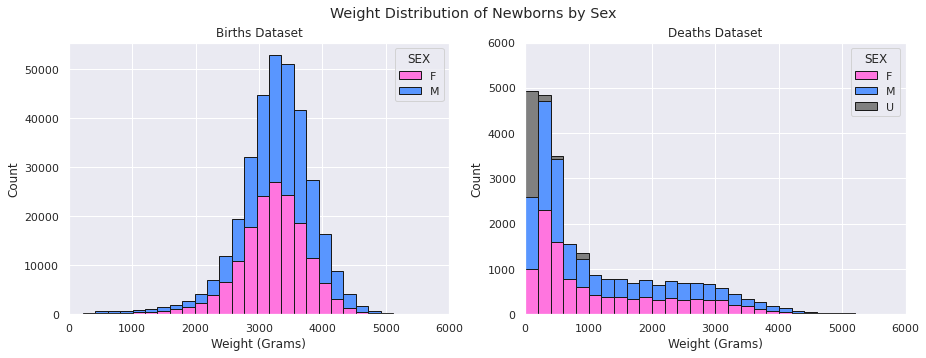

In [180]:
sns.set()
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df_births.pivot(values="DBWT", columns="SEX").plot(kind="hist", bins=50, stacked=True, xlim=(0, 6000), color=["#ff75df", "#5996ff"], edgecolor="k", title="Births Dataset", ax=ax[0])
df_deaths.pivot(values="DBWT", columns="SEX").plot(kind="hist", bins=50, stacked=True, xlim=(0, 6000), ylim=(0,6000), color=["#ff75df", "#5996ff", "Grey"], edgecolor="k", title="Deaths Dataset", ax=ax[1])
ax[0].set_xlabel("Weight (Grams)")
ax[0].set_ylabel("Count")
ax[1].set_xlabel("Weight (Grams)")
ax[1].set_ylabel("Count")
plt.suptitle("Weight Distribution of Newborns by Sex")
plt.show()

Here is a histogram showing the distribution of weights of the infants. **F, M and U** refer to **female, male and undefined** respectively.<br><br>
In births dataset, we can see that most infants fall in the range of normal weight, and low weight is more common that high weight. Males tend to weigh higher than females.<br><br>
In deaths dataset, there is also recorded weights of unalive delivered infants. They generally tend to weigh much lower since they dont grow fine. Undefined sex here is stacked at the very left of the graph since these are premature fetuses which died even before their sex can be detected.

#### Age of Becoming Mother by Education

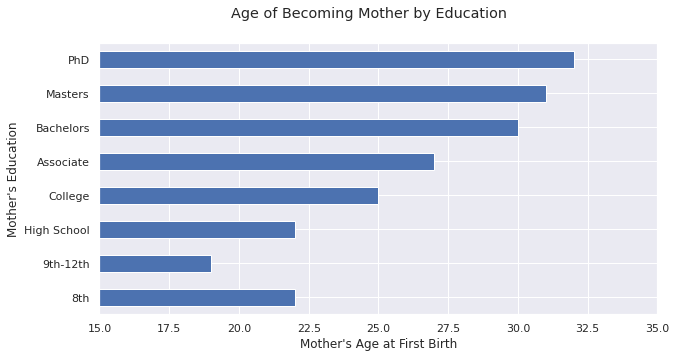

In [181]:
plt.figure(figsize=(10,5))
df_births[(df_births["PRIORLIVE"]==0) & (df_births["MEDUC"]!=9)].groupby("MEDUC").median()["MAGER"].plot(kind="barh")
plt.yticks(np.arange(8), ("8th", "9th-12th", "High School", "College", 
                          "Associate", "Bachelors", "Masters", "PhD"))
plt.ylabel("Mother\'s Education")
plt.xlabel("Mother\'s Age at First Birth")
plt.suptitle("Age of Becoming Mother by Education")
plt.xlim(15, 35)
plt.show()

Women tend to be mothers earlier when they are educated less. Women pursuing higher education give their first birth as late as around 30 years age.

#### Mother's Birth Counts by Age

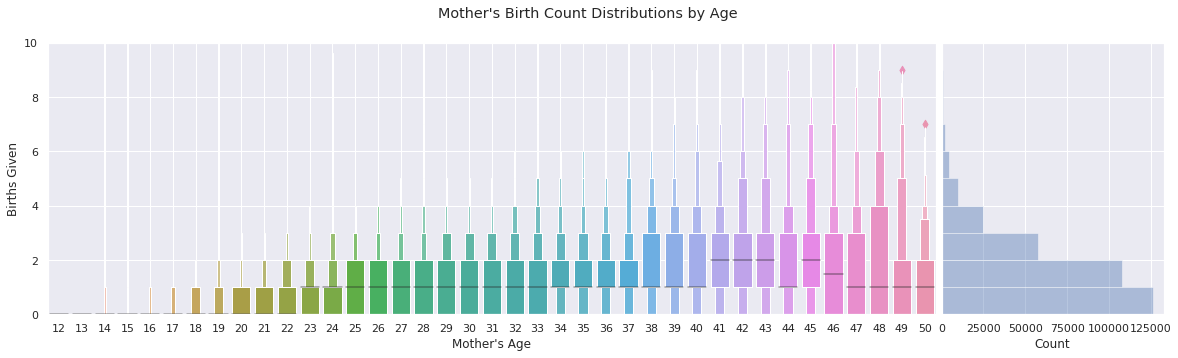

In [182]:
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(20, 5), sharey=True, gridspec_kw={"width_ratios":[4,1]})
plt.subplots_adjust(wspace=0.01)
sns.boxenplot(data=df_births, x="MAGER", y="PRIORLIVE", ax= ax1)
sns.distplot(df_births["PRIORLIVE"], vertical=True, bins=np.arange(0,10,1),kde=None, ax= ax2)
ax1.set_ylim(0,10)
ax1.set_xlabel("Mother's Age")
ax1.set_ylabel("Births Given")
ax2.set_xlabel("Count")
ax2.set_ylabel("")
plt.suptitle("Mother's Birth Count Distributions by Age")
plt.show()

#### Mothers vs Fathers by Education and Race

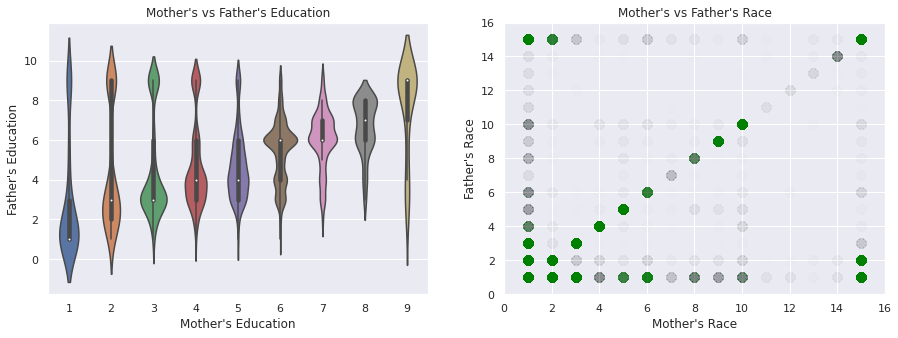

In [183]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.violinplot(data=df_births.sample(5000, random_state=11), x="MEDUC", y="FEDUC", ax=ax1)
ax1.set_xlabel("Mother\'s Education")
ax1.set_ylabel("Father\'s Education")
ax1.set_title("Mother\'s vs Father\'s Education")

ax2.scatter(df_births.MRACE15[:10**5], df_births.FRACE15[:10**5], alpha=0.003, s=100, c="green")
ax2.set_ylim(0, 16)
ax2.set_xlim(0, 16)
ax2.set_xlabel("Mother\'s Race")
ax2.set_ylabel("Father\'s Race")
ax2.set_title("Mother\'s vs Father\'s Race")
plt.show()

It seems that more parents share similar levels of education, but there is a variance. However race seems to be more strict factor when choosing partners.

#### Correlation Matrix Heat Map

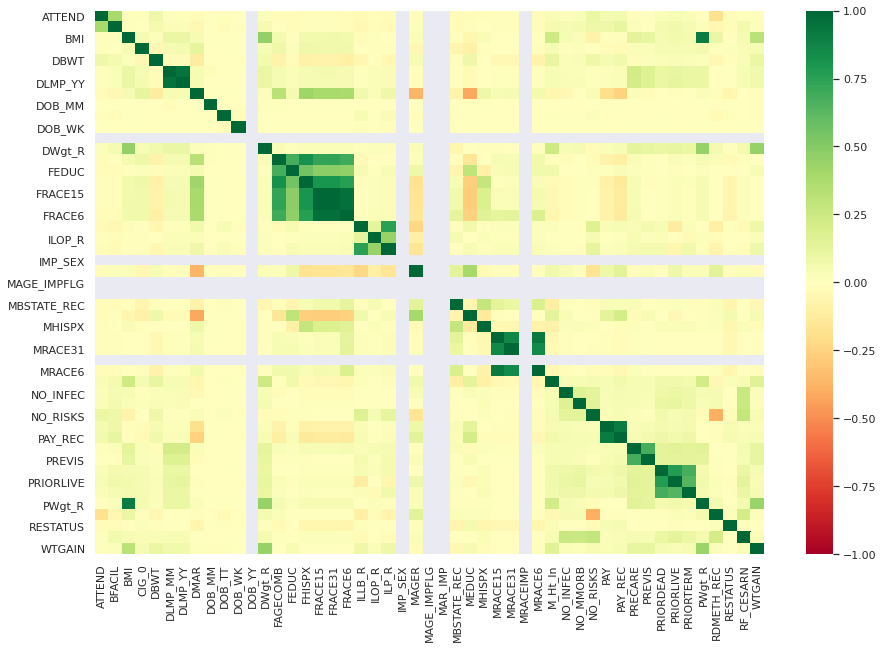

In [184]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df_births.corr(), cmap="RdYlGn", vmin=-1, vmax=1)
plt.show()

Correlation heatmaps are quite good to show relevant fields in our dataset. Here is an example on our dataset before any preprocessing is done. As wee can see here, empty columns create blank white lines. There seems to be high correlation between parents age, education and race. Also high correlation between BMI, weight, height and pregnancy weight gain mertrics since they generally depend on each other.<br><br>
Other than those there seems to be no remarkable correlations. DBWT (delivery weight) seem to be uncorrelated with other features. This is not good, but they may still be good indicators when combined. Also data is not processed so some of these fields that interpreted as continuous values are actually categorical. This matrix is very likely to change after preprocessing.

## Data Preparation<a class="anchor" id="data_preparation"></a>

Data preparation is a very important step for this project since data provided is in a quite raw state. In this chapter we will clean, impute and preprocess our data at hand.

### Births Dataset

#### Handling Missing Values

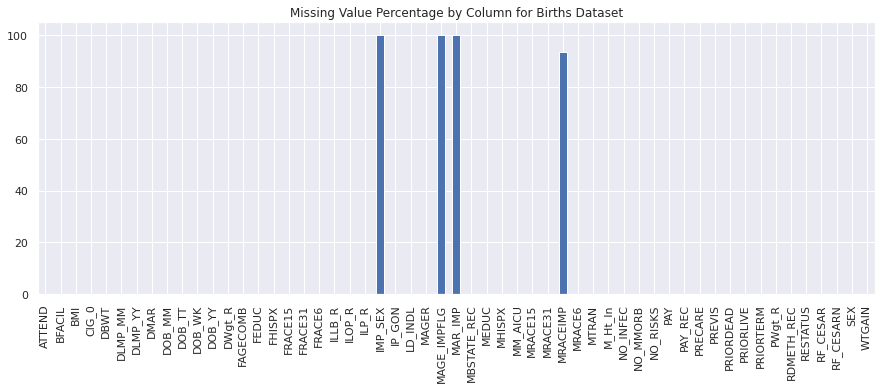

In [185]:
percent_missing_births = df_births.isna().sum() * 100 / len(df_births)
percent_missing_births.plot(kind="bar", figsize=(15,5), title="Missing Value Percentage by Column for Births Dataset")
plt.show()

Above is a plot representing percentage of nan values for each column in births dataset. As wee can see, 4 columns are almost empty while others seem to have no nan values. We can drop these columns since ther is almost no data in them.

In [186]:
df_births.drop(columns=["IMP_SEX", "MAGE_IMPFLG", "MAR_IMP", "MRACEIMP"], axis=1, inplace=True)

We can also drop one of two columns that very correlated with each other and use only one.

In [187]:
df_births.drop(columns=["FRACE6", "FRACE31", "MRACE6", "MRACE31", "PAY"], axis=1, inplace=True)

Then we correct dtypes and encode object type columns.

In [188]:
for column in df_births.select_dtypes(include=["object"]):
    df_births[column] = df_births[column].astype("category")
    df_births[column] = df_births[column].cat.codes
    df_births[column] = df_births[column].astype("category")


In [189]:
df_births["ATTEND"] = df_births["ATTEND"].astype("category")
df_births["BFACIL"] = df_births["BFACIL"].astype("category")
df_births["DMAR"] = df_births["DMAR"].astype("category")
df_births["FEDUC"] = df_births["FEDUC"].astype("category")
df_births["FHISPX"] = df_births["FHISPX"].astype("category")
df_births["FRACE15"] = df_births["FRACE15"].astype("category")
df_births["MBSTATE_REC"] = df_births["MBSTATE_REC"].astype("category")
df_births["MEDUC"] = df_births["MEDUC"].astype("category")
df_births["MHISPX"] = df_births["MHISPX"].astype("category")
df_births["MRACE15"] = df_births["MRACE15"].astype("category")
df_births["NO_INFEC"] = df_births["NO_INFEC"].astype("category")
df_births["NO_MMORB"] = df_births["NO_MMORB"].astype("category")
df_births["NO_RISKS"] = df_births["NO_RISKS"].astype("category")
df_births["PAY_REC"] = df_births["PAY_REC"].astype("category")
df_births["RDMETH_REC"] = df_births["RDMETH_REC"].astype("category")
df_births["RESTATUS"] = df_births["RESTATUS"].astype("category")

As stated in the previous chapter, there are many nan values encoded as numbers into data according to the documentation of the dateset. For categorical variables it might be reasonable since they could have meaning of itself. But for continuous variables, it appears as a extreme outlier value so they should be eliminated.

In [190]:
df_births["BMI"].replace(99.9, np.nan, inplace=True)
df_births["CIG_0"].replace(99, np.nan, inplace=True)
df_births["DLMP_MM"].replace(99, np.nan, inplace=True)
df_births["DLMP_YY"].replace(9999, np.nan, inplace=True)
df_births["DOB_YY"].replace(9999, np.nan, inplace=True)
df_births["DWgt_R"].replace(999, np.nan, inplace=True)
df_births["FAGECOMB"].replace(99, np.nan, inplace=True)
df_births["ILLB_R"].replace(999, np.nan, inplace=True)
df_births["ILLB_R"].replace(888, 0, inplace=True)
df_births["ILOP_R"].replace(999, np.nan, inplace=True)
df_births["ILOP_R"].replace(888, 0, inplace=True)
df_births["ILP_R"].replace(999, np.nan, inplace=True)
df_births["ILP_R"].replace(888, 0, inplace=True)
df_births["M_Ht_In"].replace(99, np.nan, inplace=True)
df_births["PRECARE"].replace(99, np.nan, inplace=True)
df_births["PREVIS"].replace(99, np.nan, inplace=True)
df_births["PRIORLIVE"].replace(99, np.nan, inplace=True)
df_births["PRIORTERM"].replace(99, np.nan, inplace=True)
df_births["PRIORDEAD"].replace(99, np.nan, inplace=True)
df_births["PWgt_R"].replace(999, np.nan, inplace=True)
df_births["RF_CESARN"].replace(99, np.nan, inplace=True)
df_births["WTGAIN"].replace(99, np.nan, inplace=True)

Lets take a look at missing values once again.

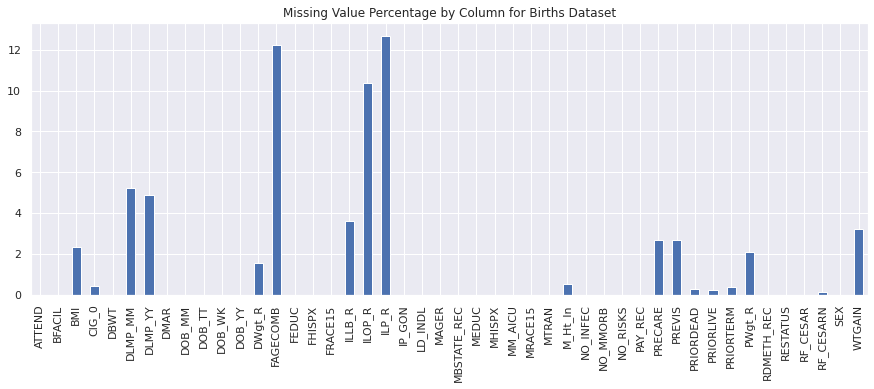

In [191]:
percent_missing_births = df_births.isna().sum() * 100 / len(df_births)
percent_missing_births.plot(kind="bar", figsize=(15,5), title="Missing Value Percentage by Column for Births Dataset")
plt.show()

Here we can see that most fields have nan values while it is not in great amounts. In order not to lose valuable information, we will impute those missing values.<br>
For values that are more continous and distributed median will be used. For values that are more discrete and centered, mode will be used.

In [192]:
df_births["BMI"].fillna(df_births["BMI"].median(), inplace=True)
df_births["CIG_0"].fillna(df_births["CIG_0"].mode()[0], inplace=True)
df_births["DLMP_MM"].fillna(df_births["DLMP_MM"].mode()[0], inplace=True)
df_births["DLMP_YY"].fillna(df_births["DLMP_YY"].mode()[0], inplace=True)
df_births["DOB_YY"].fillna(df_births["DOB_YY"].mode()[0], inplace=True)
df_births["DWgt_R"].fillna(df_births["DWgt_R"].median(), inplace=True)
df_births["FAGECOMB"].fillna(df_births["FAGECOMB"].mode()[0], inplace=True)
df_births["ILLB_R"].fillna(df_births["ILLB_R"].mode()[0], inplace=True)
df_births["ILOP_R"].fillna(df_births["ILOP_R"].mode()[0], inplace=True)
df_births["ILP_R"].fillna(df_births["ILP_R"].mode()[0], inplace=True)
df_births["M_Ht_In"].fillna(df_births["M_Ht_In"].median(), inplace=True)
df_births["PRECARE"].fillna(df_births["PRECARE"].mode()[0], inplace=True)
df_births["PREVIS"].fillna(df_births["PREVIS"].mode()[0], inplace=True)
df_births["PRIORLIVE"].fillna(df_births["PRIORLIVE"].mode()[0], inplace=True)
df_births["PRIORTERM"].fillna(df_births["PRIORTERM"].mode()[0], inplace=True)
df_births["PRIORDEAD"].fillna(df_births["PRIORDEAD"].mode()[0], inplace=True)
df_births["PWgt_R"].fillna(df_births["PWgt_R"].median(), inplace=True)
df_births["RF_CESARN"].fillna(df_births["RF_CESARN"].mode()[0], inplace=True)
df_births["WTGAIN"].fillna(df_births["WTGAIN"].median(), inplace=True)

#### Creating an Integrated Column
Columns that are starting with **DOB** are indicating the time of delivery. Birth date and time is not relevant to weight of a baby, so it can be ignored.<br>
Columns that are starting with **DLMP** are indicating the last time the mother had normal menstrual cycle. This information does not mean anything standalone. It is just a point in time.<br><br>
Neverthless the amount of time between normal menstrual cycle and birth date (expected) may be a valuable indicator. We can get the amount of days in between this two dates as a feature named **DLMP_TO_DOB**, then drop other unnecessary columns to reduce dimension.

In [193]:
df_births["DLMP_MM"] = df_births["DLMP_MM"].astype("int")
df_births["DLMP_YY"] = df_births["DLMP_YY"].astype("int")
df_births["DLMP_DATE"] = pd.to_datetime(df_births["DLMP_YY"].astype(str) + df_births["DLMP_MM"].astype(str), format='%Y%m')
df_births["DOB_DATE"] = pd.to_datetime(df_births["DOB_YY"].astype(str) + df_births["DOB_MM"].astype(str), format='%Y%m')
df_births["DLMP_TO_DOB"] = (df_births["DOB_DATE"] - df_births["DLMP_DATE"]).dt.days.astype("int")

In [194]:
df_births.drop(columns=["DLMP_DATE", "DLMP_YY", "DLMP_MM",
                        "DOB_DATE", "DOB_YY", "DOB_MM", "DOB_WK", "DOB_TT"], axis=1, inplace=True)

#### Creating Target Variable of The Classifier
As stated in the problem chapter above, we are trying to classify the weight of the baby to be born. We will use birth weight to group them into 3 categories as **Low, Normal, High** and store our it as our target variable in **WEIGHT_CAT** column. Missing weight values wont get imputed but dropped since there will already be a very high class imbalance.

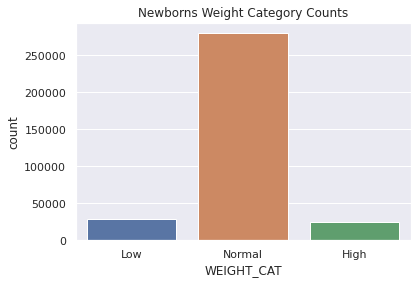

In [195]:
df_births["DBWT"].replace(9999, np.nan, inplace=True)
df_births.dropna(subset=["DBWT"], inplace=True)
df_births["WEIGHT_CAT"] = pd.cut(df_births["DBWT"], [0, 2500, 4000, 8165], labels=["Low", "Normal", "High"])
df_births.drop(columns=["DBWT"], axis=1, inplace=True)
sns.countplot(x=df_births["WEIGHT_CAT"], data=df_births)
plt.title("Newborns Weight Category Counts")
plt.show()

As we can see in above plot, most of the infants weigh normal and there is a huge class imbalance.

#### Correlation Heatmap
After all is done, we can again take a look at correlation between non cateforical features.

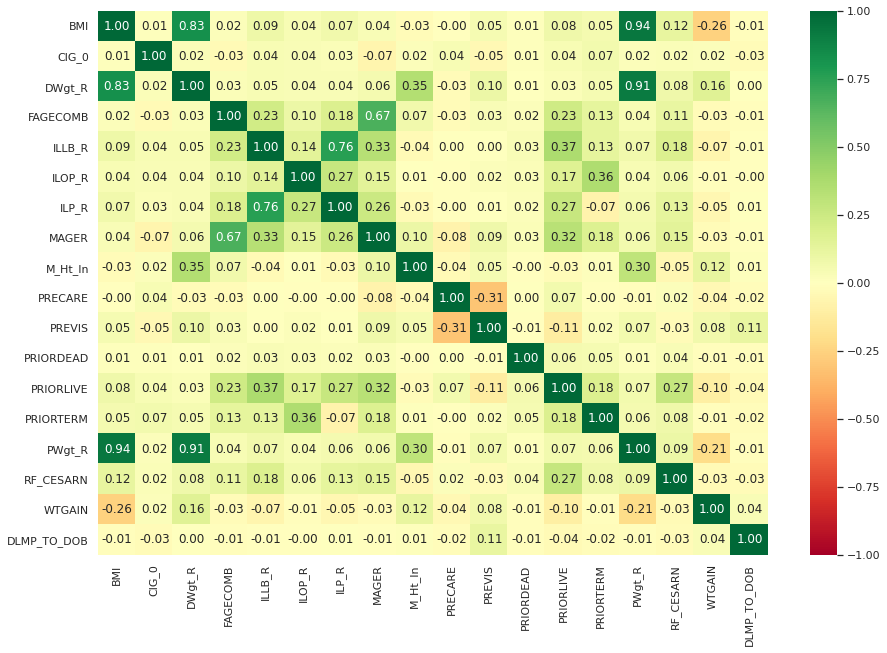

In [233]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df_births.corr(), cmap="RdYlGn", vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.show()

As wee can see here, number of features are reduced and missing values are gone. Weight of an infant is mostly correlated to mother's weight, height, weight gain , number of prenatal visits and days between birth and normal menstrual cycle. However we can not says that any of those are highly correlated to weight and good estimators.

#### Visual EDA
As we divided our dataset into 3 targets class, we may visualize their relations with each other and with clusters. This visualization is often referred as explatory data analysis.

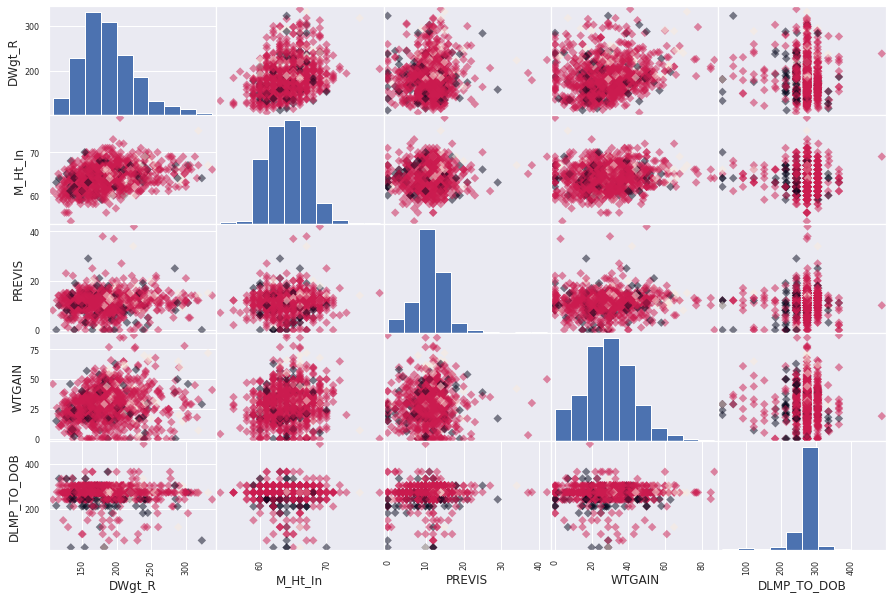

In [197]:
eda_sample = df_births.sample(1000, random_state=11)
pd.plotting.scatter_matrix(eda_sample[["DWgt_R", "M_Ht_In", "PREVIS", "WTGAIN", "DLMP_TO_DOB"]],
                          c=eda_sample["WEIGHT_CAT"].cat.codes, figsize=(15,10), marker="D",)
plt.show()

It seems that less weight gain of mother during pregnancy and less dlmp_to_dob generally result in less birth weight. They still might be okay indicators all together even if they are individually not.

#### One-hot Encoding
Considerable amount of our features are categorical values encoded numerically. Algorithms provided in scikit-learn does not interpret them as categories but as continuous values.<br>
In order to tackle this problem, we will one-hot encode our categorical features.

In [198]:
cols_to_scale_bw = list(df_births.select_dtypes(exclude=["category"]))
cols_to_encode_bw = list(df_births.select_dtypes(include=["category"]))
cols_to_encode_bw.remove("WEIGHT_CAT")

In [199]:
df_births_bw = pd.get_dummies(df_births, columns=cols_to_encode_bw)

### Deaths Dataset

#### Handling Missing Values

In [200]:
df_deaths["SEX"] = df_deaths["SEX"].astype("category")
df_deaths["SEX"] = df_deaths["SEX"].cat.codes
df_deaths["SEX"] = df_deaths["SEX"].astype("category")

In [201]:
for column in df_deaths:
    df_deaths[column] = pd.to_numeric(df_deaths[column], errors="coerce")

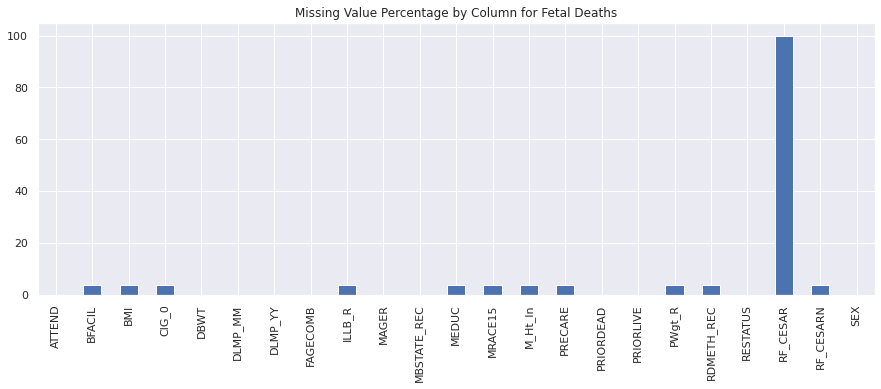

In [202]:
percent_missing_deaths = df_deaths.isna().sum() * 100 / len(df_deaths)
percent_missing_deaths.plot(kind="bar", figsize=(15,5), title="Missing Value Percentage by Column for Fetal Deaths")
plt.show()

As we can see in above plot some columns have missing values while **RF_CESAR** is totally missing. We can drop that column.

In [203]:
df_deaths.drop(columns=["RF_CESAR"], axis=1, inplace=True)

As stated in the previous chapter, there are many nan values encoded as numbers into data according to the documentation of the dateset. For categorical variables it might be reasonable since they could have meaning of itself. But for continuous variables, it appears as a extreme outlier value so they should be eliminated.

In [204]:
df_deaths["BMI"] = pd.to_numeric(df_deaths["BMI"], errors="coerce")
df_deaths["BMI"].replace(99.9, np.nan, inplace=True)
df_deaths["CIG_0"] = pd.to_numeric(df_deaths["CIG_0"], errors="coerce")
df_deaths["CIG_0"].replace(99, np.nan, inplace=True)
df_deaths["FAGECOMB"] = pd.to_numeric(df_deaths["FAGECOMB"], errors="coerce")
df_deaths["FAGECOMB"].replace(99, np.nan, inplace=True)
df_deaths["ILLB_R"].replace(999, np.nan, inplace=True)
df_deaths["ILLB_R"].replace(888, 0, inplace=True)
df_deaths["M_Ht_In"] = pd.to_numeric(df_deaths["M_Ht_In"], errors="coerce")
df_deaths["M_Ht_In"].replace(99, np.nan, inplace=True)
df_deaths["PRECARE"] = pd.to_numeric(df_deaths["PRECARE"], errors="coerce")
df_deaths["PRECARE"].replace(99, np.nan, inplace=True)
df_deaths["PRIORLIVE"] = pd.to_numeric(df_deaths["PRIORLIVE"], errors="coerce")
df_deaths["PRIORLIVE"].replace(99, np.nan, inplace=True)
df_deaths["PRIORDEAD"] = pd.to_numeric(df_deaths["PRIORDEAD"], errors="coerce")
df_deaths["PRIORDEAD"].replace(99, np.nan, inplace=True)
df_deaths["PWgt_R"] = pd.to_numeric(df_deaths["PWgt_R"], errors="coerce")
df_deaths["PWgt_R"].replace(999, np.nan, inplace=True)
df_deaths["RF_CESARN"] = pd.to_numeric(df_deaths["RF_CESARN"], errors="coerce")
df_deaths["RF_CESARN"].replace(99, np.nan, inplace=True)

Lets take a look at missing values once again.

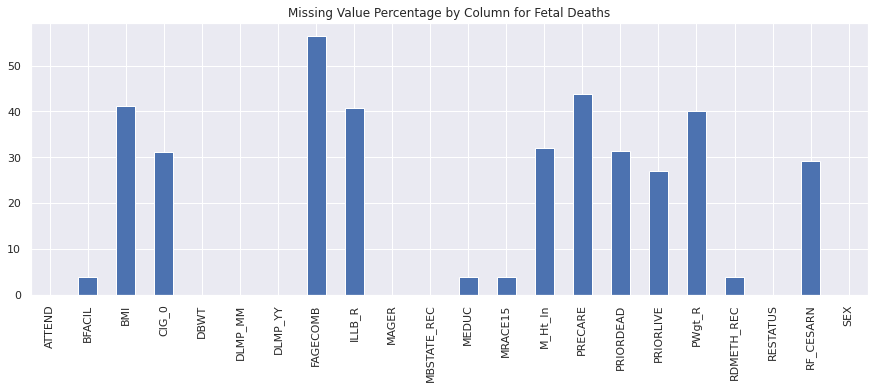

In [205]:
percent_missing_deaths = df_deaths.isna().sum() * 100 / len(df_deaths)
percent_missing_deaths.plot(kind="bar", figsize=(15,5), title="Missing Value Percentage by Column for Fetal Deaths")
plt.show()

Here we can see that most fields have nan values while and some are around 50 percent. We may try to drop rows that lack half of these columns together.

In [206]:
df_deaths.dropna(thresh=12, axis=0, inplace=True)

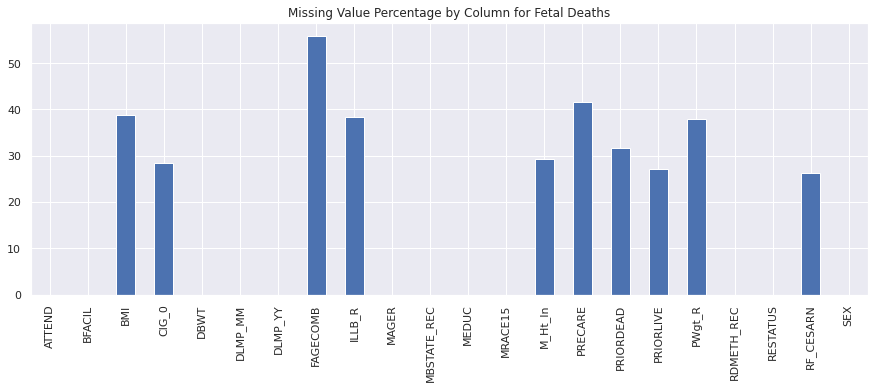

In [207]:
percent_missing_deaths = df_deaths.isna().sum() * 100 / len(df_deaths)
percent_missing_deaths.plot(kind="bar", figsize=(15,5), title="Missing Value Percentage by Column for Fetal Deaths")
plt.show()

As we can see here, most of the missing percentages remains missing. This means rows that lack these features still have many information on them. We better impute them rather than drop them and lose information. For values that are more continous and distributed median will be used. For values that are more discrete and centered, mode will be used as before.

In [208]:
df_deaths

,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,FAGECOMB,ILLB_R,MAGER,MBSTATE_REC,MEDUC,MRACE15,M_Ht_In,PRECARE,PRIORDEAD,PRIORLIVE,PWgt_R,RDMETH_REC,RESTATUS,RF_CESARN,SEX
0,1,1.0,34.8,0.0,1130,7,2016,NaN,52.0,36,1,3.0,3.0,60.0,2.0,0.0,3.0,178.0,4.0,1,3.0,1
1,1,1.0,38.7,20.0,1435,6,2016,26.0,3.0,23,1,4.0,15.0,61.0,2.0,0.0,3.0,205.0,3.0,1,0.0,1
2,2,1.0,32.8,0.0,3360,4,2016,NaN,0.0,22,1,3.0,3.0,64.0,0.0,0.0,0.0,191.0,1.0,1,0.0,1
3,1,1.0,21.5,0.0,2381,4,2016,33.0,199.0,33,2,5.0,10.0,60.0,7.0,1.0,0.0,110.0,1.0,1,0.0,1
4,1,1.0,NaN,0.0,3635,4,2016,21.0,0.0,20,1,3.0,1.0,70.0,5.0,0.0,0.0,NaN,1.0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49165,1,1.0,NaN,NaN,9999,6,2017,NaN,NaN,33,1,9.0,1.0,NaN,NaN,NaN,NaN,NaN,9.0,1,NaN,2
49166,2,1.0,NaN,NaN,9999,8,2017,NaN,NaN,34,1,9.0,1.0,NaN,NaN,NaN,NaN,NaN,9.0,1,NaN,2
49167,2,1.0,NaN,NaN,9999,6,2017,NaN,NaN,18,1,9.0,1.0,NaN,NaN,NaN,NaN,NaN,9.0,1,NaN,2
49168,2,1.0,NaN,NaN,9999,7,2017,NaN,NaN,27,1,9.0,1.0,NaN,NaN,NaN,NaN,NaN,9.0,1,NaN,2


In [209]:
df_deaths["BMI"].fillna(df_deaths["BMI"].median(), inplace=True)
df_deaths["BMI"] = df_deaths["BMI"].astype("float")
df_deaths["CIG_0"].fillna(df_deaths["CIG_0"].mode()[0], inplace=True)
df_deaths["CIG_0"] = df_deaths["CIG_0"].astype("int")
df_deaths["FAGECOMB"].fillna(df_deaths["FAGECOMB"].mode()[0], inplace=True)
df_deaths["FAGECOMB"] = df_deaths["FAGECOMB"].astype("int")
df_deaths["ILLB_R"].fillna(df_deaths["ILLB_R"].mode()[0], inplace=True)
df_deaths["M_Ht_In"].fillna(df_deaths["M_Ht_In"].median(), inplace=True)
df_deaths["M_Ht_In"] = df_deaths["M_Ht_In"].astype("float")
df_deaths["PRECARE"].fillna(df_deaths["PRECARE"].mode()[0], inplace=True)
df_deaths["PRECARE"] = df_deaths["PRECARE"].astype("int")
df_deaths["PRIORLIVE"].fillna(df_deaths["PRIORLIVE"].mode()[0], inplace=True)
df_deaths["PRIORLIVE"] = df_deaths["PRIORLIVE"].astype("int")
df_deaths["PRIORDEAD"].fillna(df_deaths["PRIORDEAD"].mode()[0], inplace=True)
df_deaths["PRIORDEAD"] = df_deaths["PRIORDEAD"].astype("int")
df_deaths["PWgt_R"].fillna(df_deaths["PWgt_R"].median(), inplace=True)
df_deaths["PWgt_R"] = df_deaths["PWgt_R"].astype("float")
df_deaths["RF_CESARN"].fillna(df_deaths["RF_CESARN"].mode()[0], inplace=True)
df_deaths["RF_CESARN"] = df_deaths["RF_CESARN"].astype("int")

In [210]:
df_deaths["BFACIL"].fillna(df_deaths["BFACIL"].mode()[0], inplace=True)
df_deaths["MEDUC"].fillna(df_deaths["MEDUC"].mode()[0], inplace=True)
df_deaths["RDMETH_REC"].fillna(df_deaths["RDMETH_REC"].mode()[0], inplace=True)

In [211]:
df_deaths["ATTEND"] = df_deaths["ATTEND"].astype("category")
df_deaths["BFACIL"] = df_deaths["BFACIL"].astype("category")
df_deaths["MBSTATE_REC"] = df_deaths["MBSTATE_REC"].astype("category")
df_deaths["MEDUC"] = df_deaths["MEDUC"].astype("category")
df_deaths["MRACE15"].fillna(df_deaths["MRACE15"].mode()[0], inplace=True)
df_deaths["MRACE15"] = df_deaths["MRACE15"].astype("category")
df_deaths["RDMETH_REC"] = df_deaths["RDMETH_REC"].astype("category")
df_deaths["RESTATUS"] = df_deaths["RESTATUS"].astype("category")

In [212]:
for column in df_deaths.select_dtypes(include=["object"]):
    df_deaths[column] = df_deaths[column].astype("category")
    df_deaths[column] = df_deaths[column].cat.codes
    df_deaths[column] = df_deaths[column].astype("category")


### Total Dataset
For the problem of fetal death which is described in the first chapter requires a concatenated data of births and fetal deaths so that we can compare factors of pregnancies with positive and negative outcomes.<br>
Since there are more than 300.000 samples of positive cases and only around 50.000 samples of negative cases which is normal, we will have a huge class imbalance in this dataset.<br>
Classification on such data will probably result in high accuracy just predicting the dominant class but it does not mean that it is a good classifier.<br>

#### Data Undersampling to Tackle Class Imbalance
We can tackle this class imbalance problem by undersampling the dominant class which is obviously the birth case.

In [213]:
df_births_sample = df_births.sample(50000, random_state=11)

#### Outcome of Pregnancy
We need to create a target value for our classification.

In [214]:
df_births_sample["OUTCOME"] = 0
df_deaths["OUTCOME"] = 1

#### Dataframe Concatenation

In [215]:
df_total = pd.concat([df_births_sample, df_deaths], ignore_index=True, join="inner")

Since we are trying to predict the outcome of the pregnancy, we are still in the pre-birth stage so that some features like sex and weight are not available at that time hence should be dropped.

In [216]:
df_total.drop(columns=["SEX"], axis=1, inplace=True)

In [217]:
df_total["ATTEND"] = df_total["ATTEND"].astype("category")
df_total["BFACIL"] = df_total["BFACIL"].astype("category")
df_total["MBSTATE_REC"] = df_total["MBSTATE_REC"].astype("category")
df_total["MEDUC"] = df_total["MEDUC"].astype("category")
df_total["MRACE15"] = df_total["MRACE15"].astype("category")
df_total["RDMETH_REC"] = df_total["RDMETH_REC"].astype("category")
df_total["RESTATUS"] = df_total["RESTATUS"].astype("category")
df_total["OUTCOME"] = df_total["OUTCOME"].astype("category")

Lets take a look at our concatenated dataframe.

In [218]:
df_total

,ATTEND,BFACIL,BMI,CIG_0,FAGECOMB,ILLB_R,MAGER,MBSTATE_REC,MEDUC,MRACE15,M_Ht_In,PRECARE,PRIORDEAD,PRIORLIVE,PWgt_R,RDMETH_REC,RESTATUS,RF_CESARN,OUTCOME
0,1,1.0,31.2,0.0,45.0,0.0,35,2,3.0,1.0,60.0,2.0,0.0,0.0,160.0,1.0,1,0.0,0
1,1,1.0,17.2,0.0,36.0,23.0,30,2,6.0,1.0,60.0,2.0,0.0,1.0,88.0,2.0,1,1.0,0
2,1,1.0,23.0,0.0,32.0,0.0,28,1,3.0,1.0,62.0,4.0,0.0,0.0,126.0,3.0,2,0.0,0
3,1,1.0,26.4,0.0,25.0,0.0,25,2,5.0,2.0,63.0,2.0,0.0,0.0,149.0,1.0,1,0.0,0
4,1,1.0,33.7,0.0,35.0,58.0,35,1,6.0,1.0,67.0,3.0,0.0,2.0,215.0,1.0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97278,1,1.0,26.9,0.0,31.0,0.0,33,1,9.0,1.0,64.0,2.0,0.0,0.0,157.0,9.0,1,0.0,1
97279,2,1.0,26.9,0.0,31.0,0.0,34,1,9.0,1.0,64.0,2.0,0.0,0.0,157.0,9.0,1,0.0,1
97280,2,1.0,26.9,0.0,31.0,0.0,18,1,9.0,1.0,64.0,2.0,0.0,0.0,157.0,9.0,1,0.0,1
97281,2,1.0,26.9,0.0,31.0,0.0,27,1,9.0,1.0,64.0,2.0,0.0,0.0,157.0,9.0,1,0.0,1


#### One-hot Encoding
Considerable amount of our features are categorical values encoded numerically. Algorithms provided in scikit-learn does not interpret them as categories but as continuous values.<br>
In order to tackle this problem, we will one-hot encode our categorical features.

In [219]:
cols_to_scale_fd = list(df_total.select_dtypes(exclude=["category"]))
cols_to_encode_fd= list(df_total.select_dtypes(include=["category"]))
cols_to_encode_fd.remove("OUTCOME")

In [220]:
df_total = pd.get_dummies(df_total, columns=cols_to_encode_fd)

After all the preparation, our total dataframe looks like this.

In [221]:
df_total

,BMI,CIG_0,FAGECOMB,ILLB_R,MAGER,M_Ht_In,PRECARE,PRIORDEAD,PRIORLIVE,PWgt_R,RF_CESARN,OUTCOME,ATTEND_1,ATTEND_2,ATTEND_3,ATTEND_4,ATTEND_5,ATTEND_9,BFACIL_1.0,BFACIL_2.0,BFACIL_3.0,BFACIL_4.0,BFACIL_5.0,BFACIL_6.0,BFACIL_7.0,BFACIL_9.0,MBSTATE_REC_1,MBSTATE_REC_2,MBSTATE_REC_3,MEDUC_1.0,MEDUC_2.0,MEDUC_3.0,MEDUC_4.0,MEDUC_5.0,MEDUC_6.0,MEDUC_7.0,MEDUC_8.0,MEDUC_9.0,MRACE15_1.0,MRACE15_2.0,MRACE15_3.0,MRACE15_4.0,MRACE15_5.0,MRACE15_6.0,MRACE15_7.0,MRACE15_8.0,MRACE15_9.0,MRACE15_10.0,MRACE15_11.0,MRACE15_12.0,MRACE15_13.0,MRACE15_14.0,MRACE15_15.0,RDMETH_REC_1.0,RDMETH_REC_2.0,RDMETH_REC_3.0,RDMETH_REC_4.0,RDMETH_REC_5.0,RDMETH_REC_6.0,RDMETH_REC_9.0,RESTATUS_1,RESTATUS_2,RESTATUS_3,RESTATUS_4
0,31.2,0.0,45.0,0.0,35,60.0,2.0,0.0,0.0,160.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,17.2,0.0,36.0,23.0,30,60.0,2.0,0.0,1.0,88.0,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,23.0,0.0,32.0,0.0,28,62.0,4.0,0.0,0.0,126.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,26.4,0.0,25.0,0.0,25,63.0,2.0,0.0,0.0,149.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,33.7,0.0,35.0,58.0,35,67.0,3.0,0.0,2.0,215.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97278,26.9,0.0,31.0,0.0,33,64.0,2.0,0.0,0.0,157.0,0.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
97279,26.9,0.0,31.0,0.0,34,64.0,2.0,0.0,0.0,157.0,0.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
97280,26.9,0.0,31.0,0.0,18,64.0,2.0,0.0,0.0,157.0,0.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
97281,26.9,0.0,31.0,0.0,27,64.0,2.0,0.0,0.0,157.0,0.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


## Modeling<a class="anchor" id="modeling"></a>

### Model Selection

![alt text](https://scikit-learn.org/stable/_static/ml_map.png)

Map above is provided officially by scikit-learn in order to help deciding models to aplly to different kind of tasks. Considering that we are trying to predict a category by non textual features, this map leads us to svc, knn and tree based classifiers. KNN does not get the job done in this scenerio and svc runs extremely slow.<br><br>
Considering above reasoun **RandomForestClassifier** provided by scikit-learn is selected for this task. Among all other ensemble classifiers introduced here, random forest is most commonly used and best performing.<br>
Since random forest uses different trees in splits, it also does some kind of feature selection by itself which is a plus.

### Birth Weight Classifier
In this chapter, we will try to predict the weight class of the baby to be born. Since there is a huge class imbalance in our data, it is best to balance them to get rid of the bias on dominant class which is obviously the normal weigth.

#### Balancing the Data

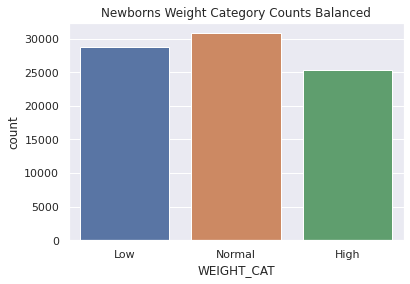

In [222]:
df_births_normal = df_births_bw[df_births_bw["WEIGHT_CAT"] == "Normal"].sample(frac=0.11, random_state=11)
df_births_low = df_births_bw[df_births_bw["WEIGHT_CAT"] == "Low"]
df_births_high = df_births_bw[df_births_bw["WEIGHT_CAT"] == "High"]
df_births_balanced = pd.concat([df_births_normal, df_births_low, df_births_high], ignore_index=True, join="inner")

sns.countplot(x=df_births_balanced["WEIGHT_CAT"], data=df_births_balanced)
plt.title("Newborns Weight Category Counts Balanced")
plt.show()

#### Train Test Split

In [223]:
X_bw = df_births_balanced.drop(["WEIGHT_CAT"], axis=1)
y_bw = df_births_balanced["WEIGHT_CAT"]

X_train_bw, X_test_bw, y_train_bw, y_test_bw = train_test_split(X_bw, y_bw, test_size = 0.2, random_state=11)

#### Feature Scaling

In [224]:
scaler = StandardScaler()
X_train_scaled_bw = X_train_bw.copy()
X_test_scaled_bw = X_test_bw.copy()
X_train_scaled_bw[cols_to_scale_bw] = scaler.fit_transform(X_train_scaled_bw[cols_to_scale_bw])
X_test_scaled_bw[cols_to_scale_bw] = scaler.fit_transform(X_test_scaled_bw[cols_to_scale_bw])

#### Hyperparameter Selection
Random Forest Classifier has many hyperparameters to fine tune. Common way to explore which parameters give best result is to aplly exhaustive grid search. GridSearchCV tries all possible combinations of given parameters over k-folds to find best possible combination.<br>
However this requires enormous amounts of time in a case like this where there are many hyperparameters to tune, and practically not aplicable.<br>
In this project, I have decided to use  validation curves to explore parameters instead. This way, one paramter at a time is discovered while others kept still. It is faster since not all combinations are tried, but it still allows us to explore.<br><br>
Below are the results of validation curves. Code that generate these plots are also provided below as comments hence inactive. It takes around 10 minutes this is why it is kept as comment.

![alt text](.\\graph\\bw.jpg)

In [225]:
# parameter_grid = {"n_estimators":[10, 100, 300, 500, 700],
#                   "max_depth":[5, 10, 20, 50, 100],
#                   "min_samples_split":[2, 5, 10, 15, 20],
#                   "min_samples_leaf":[1, 2, 5, 10, 20]}

# train_scores_grid = dict()
# test_scores_grid = dict()

# for parameter in parameter_grid.keys():
#     train_scores, test_scores = validation_curve(
#                                 RandomForestClassifier(),
#                                 X=X_train_bw, y=y_train_bw,
#                                 scoring="f1_weighted",
#                                 param_name=parameter,
#                                 param_range=parameter_grid[parameter], cv = 3)
    
#     train_scores_grid[parameter] = train_scores
#     test_scores_grid[parameter] = test_scores


In [226]:
# fig, ax = plt.subplots(4, 2, figsize=(10,15))
# i = 0
# for parameter in train_scores_grid.keys():
#     train_scores_mean = np.mean(train_scores_grid[parameter], axis=1)
#     train_scores_std = np.std(train_scores_grid[parameter], axis=1)
#     test_scores_mean = np.mean(test_scores_grid[parameter], axis=1)
#     test_scores_std = np.std(test_scores_grid[parameter], axis=1)
    
#     ax[i][0].plot(parameter_grid[parameter], test_scores_mean, label="Cross-validation score",
#              color="navy", lw=2)
#     ax[i][0].fill_between(parameter_grid[parameter], test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2,
#                  color="navy", lw=2)
#     ax[i][1].plot(parameter_grid[parameter], train_scores_mean, label="Training score",
#                  color="darkorange", lw=2)
#     ax[i][1].fill_between(parameter_grid[parameter], train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2,
#                  color="darkorange", lw=2)
    
#     ax[i][0].legend(loc="best")
#     ax[i][0].set_xlabel(parameter)
#     ax[i][0].set_ylabel("F1 Score")
#     ax[i][1].legend(loc="best")
#     ax[i][1].set_xlabel(parameter)
#     ax[i][1].set_ylabel("F1 Score")
#     i = i+1

# fig.suptitle("Validation Curves for Birth Weight Classifier")
# plt.show()


#### Model Training
Best parameters considering the validation curves above are selected. This parameters are validated only on train data, test data remains totally unseen.

In [227]:
model_bw = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=10, min_samples_leaf=5)
model_bw.fit(X_train_scaled_bw, y_train_bw)
y_pred_bw = model_bw.predict(X_test_scaled_bw)

### Fetal Death Classifier

#### Train Test Split

In [228]:
X_fd = df_total.drop(["OUTCOME"], axis=1)
y_fd = df_total["OUTCOME"]

X_train_fd, X_test_fd, y_train_fd, y_test_fd = train_test_split(X_fd, y_fd, test_size = 0.2, random_state=11)

#### Feature Scaling

In [229]:
scaler = StandardScaler()
X_train_scaled_fd = X_train_fd.copy()
X_test_scaled_fd = X_test_fd.copy()
X_train_scaled_fd[cols_to_scale_fd] = scaler.fit_transform(X_train_scaled_fd[cols_to_scale_fd])
X_test_scaled_fd[cols_to_scale_fd] = scaler.fit_transform(X_test_scaled_fd[cols_to_scale_fd])

#### Hyperparameter Selection
In this project, I have decided to use  validation curves to explore parameters. This way, one parameter at a time is discovered while others kept still. It is faster since not all combinations are tried, but it still allows us to explore.<br>
Since this problem is different than previous chapter, we should explore again since this may lead us to different parameters.<br><br>
Below are the results of validation curves. Code that generate these plots are also provided below as comments hence inactive. It takes around 10 minutes this is why it is kept as comment.

![alt text](.\\graph\\fd.jpg)

In [ ]:
# parameter_grid = {"n_estimators":[10, 100, 300, 500, 700],
#                   "max_depth":[5, 10, 20, 50, 100],
#                   "min_samples_split":[2, 5, 10, 15, 20],
#                   "min_samples_leaf":[1, 2, 5, 10, 20]}

# train_scores_grid = dict()
# test_scores_grid = dict()

# for parameter in parameter_grid.keys():
#     train_scores, test_scores = validation_curve(
#                                 RandomForestClassifier(),
#                                 X=X_train_fd, y=y_train_fd,
#                                 scoring="f1",
#                                 param_name=parameter,
#                                 param_range=parameter_grid[parameter], cv = 3)
    
#     train_scores_grid[parameter] = train_scores
#     test_scores_grid[parameter] = test_scores
 

In [ ]:

# fig, ax = plt.subplots(4, 2, figsize=(10,15))
# i = 0
# for parameter in train_scores_grid.keys():
#     train_scores_mean = np.mean(train_scores_grid[parameter], axis=1)
#     train_scores_std = np.std(train_scores_grid[parameter], axis=1)
#     test_scores_mean = np.mean(test_scores_grid[parameter], axis=1)
#     test_scores_std = np.std(test_scores_grid[parameter], axis=1)
    
#     ax[i][0].plot(parameter_grid[parameter], test_scores_mean, label="Cross-validation score",
#              color="navy", lw=2)
#     ax[i][0].fill_between(parameter_grid[parameter], test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2,
#                  color="navy", lw=2)
#     ax[i][1].plot(parameter_grid[parameter], train_scores_mean, label="Training score",
#                  color="darkorange", lw=2)
#     ax[i][1].fill_between(parameter_grid[parameter], train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2,
#                  color="darkorange", lw=2)
    
#     ax[i][0].legend(loc="best")
#     ax[i][0].set_xlabel(parameter)
#     ax[i][0].set_ylabel("F1 Score")
#     ax[i][1].legend(loc="best")
#     ax[i][1].set_xlabel(parameter)
#     ax[i][1].set_ylabel("F1 Score")
#     i = i+1

# fig.suptitle("Validation Curves for Fetal Death Classifier")
# plt.show()


#### Model Training

In [ ]:
model_fd = RandomForestClassifier(n_estimators=300, max_depth=60, min_samples_split=10, min_samples_leaf=1)
model_fd.fit(X_train_scaled_fd, y_train_fd)
y_pred_fd = model_fd.predict(X_test_scaled_fd)

## Evaluation
In this chapter, we will evaluate the two models that are introduced in previous chapter. For evaluation, F1 score will be used along with the confusion matrix.<br>
F1 score is a good indicator in such classification cases. F1 score is also used in hyperparameter selection chapter.

### Birth Weight Classifier

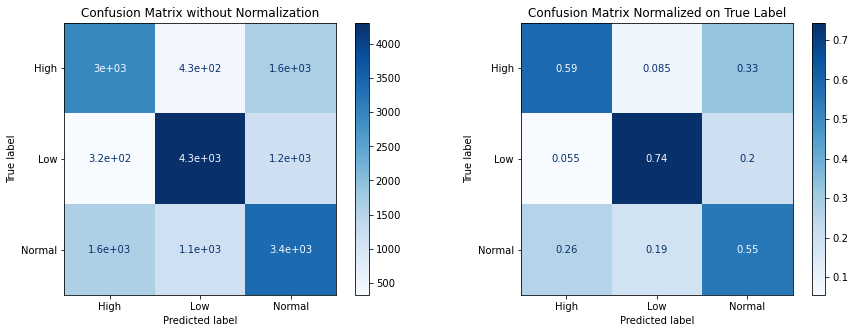

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
plot_confusion_matrix(model_bw, X_test_scaled_bw, y_test_bw, display_labels=["High", "Low", "Normal"], cmap=plt.cm.Blues, normalize=None, ax=ax1)
plot_confusion_matrix(model_bw, X_test_scaled_bw, y_test_bw, display_labels=["High", "Low", "Normal"], cmap=plt.cm.Blues, normalize="true", ax=ax2)
ax1.set_title("Confusion Matrix without Normalization")
ax2.set_title("Confusion Matrix Normalized on True Label")
plt.show()

In [ ]:
print("F1 Score:", f1_score(y_test_bw, y_pred_bw, average="weighted"))

F1 Score: 0.6268838949728273


As we can see in the above results, low weight is prediction accuracy  is around **.75**, which is kind of okay but high and normal are often confused.<br>
With weighted F1 score around **.63** we can not say that it is a good classifier. It seems that low weight is easier to detect while difference between normal and high weight depends on some other features which are not included in our dataset. As we have seen before, weight is not much correlated to the features we have.<br>
However, detecting low weight is more important in real world application. It is good that the model is best at that.

### Fetal Death Classifier

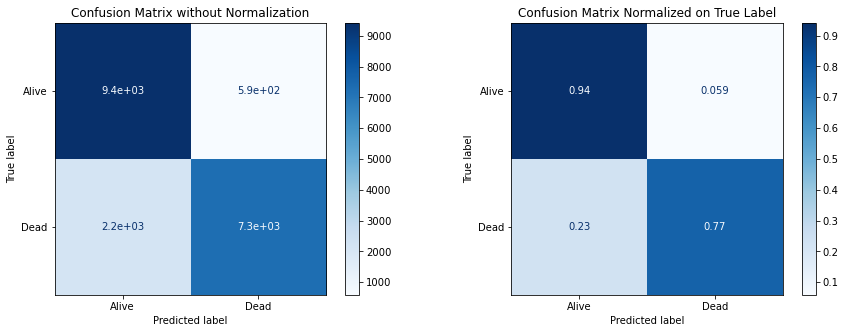

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
plot_confusion_matrix(model_fd, X_test_scaled_fd, y_test_fd, display_labels=["Alive", "Dead"], cmap=plt.cm.Blues, normalize=None, ax=ax1)
plot_confusion_matrix(model_fd, X_test_scaled_fd, y_test_fd, display_labels=["Alive", "Dead"], cmap=plt.cm.Blues, normalize="true", ax=ax2)
ax1.set_title("Confusion Matrix without Normalization")
ax2.set_title("Confusion Matrix Normalized on True Label")
plt.show()

In [ ]:
print("F1 Score:", f1_score(y_test_fd, y_pred_fd))

F1 Score: 0.8416983962155302


As we can see above, alive accuracy is around **.94** which is very good and dead accuracy is around **.77** which is okay. There are much lower death records we have than birth records in real life, so it is very important to get a lot data in this domain.<br>
F1 score of this model is around **.84** which is good for this project. If sex information was kept, it would be around .**89** but that is mostly because undefined sex category only occurs in deaths data. In a real world application where this models are aplied in early stages, sex is a feature that we can not use.<br>

## References<a class="anchor" id="references"></a>

[US Births Original Data Files](https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm)<br>
[US Births Kaggle Dataset](https://www.kaggle.com/des137/us-births-2018)<br>
[US Births Kaggle Notebook](https://www.kaggle.com/des137/usbirths)<br>
[Information on Low Birthweight](https://www.stanfordchildrens.org/en/topic/default?id=low-birthweight-90-P02382)<br>
[Information on Fetal Death](https://www.mayoclinic.org/diseases-conditions/fetal-macrosomia/symptoms-causes/syc-20372579)<br>
[Scikit-Learn Validation Curve Plotting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py)<br>
[Blog on Random Forest Optimization](https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6)<br>


**Disclaimer!** <font color='grey'>This notebook was prepared by Baran Ekin Özdemir as a term project for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>